In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter
import pandas as pd
import seaborn as sns
import matplotlib.dates as mdates
from babel.dates import format_date




#On indique à Pandas qu'on travaille sur une serie temporel en lui indiquant que notre index sera la colonne qui représente nos dates index_col='created_at'
# Il faut aussi dire qu'il l'interprete comme un date parse_dates=True
df = pd.read_csv('../data/metrics/temp_metrics_df.csv', index_col='created_at',parse_dates=True)
# df = pd.read_csv('../data/metrics/temp_metrics_df.csv')

In [14]:
df.head()

,id,status,created_at.1,varnishLevelsTargetvolume,varnishLevelsTotalvolume,operators_name,operators_level,VarnishPrinter_3DVarnishCounter,iFoil_TotalPagesCounter,events_id
created_at,,,,,,,,,,
2022-04-15 05:55:06.678,4169748,WARNING,2022-04-15 05:55:06.678,36192.322612,100000,Viktor,Operator,1792992,22881,NaN
2022-04-15 05:55:06.829,4169749,WARNING,2022-04-15 05:55:06.829,36192.322612,100000,Viktor,Operator,1792992,22881,391
2022-04-15 05:55:14.494,4169753,WARNING,2022-04-15 05:55:14.494,36192.322612,100000,Viktor,Operator,1792992,22881,NaN
2022-04-15 05:55:24.503,4169758,WARNING,2022-04-15 05:55:24.503,36192.322612,100000,Viktor,Operator,1792992,22881,NaN
2022-04-15 05:55:34.515,4169763,WARNING,2022-04-15 05:55:34.515,36192.322612,100000,Viktor,Operator,1792992,22881,NaN


In [15]:
df.index

DatetimeIndex(['2022-04-15 05:55:06.678000', '2022-04-15 05:55:06.829000',
               '2022-04-15 05:55:14.494000', '2022-04-15 05:55:24.503000',
               '2022-04-15 05:55:34.515000', '2022-04-15 05:55:44.547000',
               '2022-04-15 05:55:54.559000', '2022-04-15 05:56:04.570000',
               '2022-04-15 05:56:14.586000', '2022-04-15 05:56:24.602000',
               ...
               '2022-12-12 08:20:07.769000', '2022-12-12 08:20:17.777000',
               '2022-12-12 08:20:27.795000', '2022-12-12 08:20:37.813000',
               '2022-12-12 08:20:47.870000', '2022-12-12 08:20:57.846000',
               '2022-12-12 08:21:08.067000', '2022-12-12 08:21:18.076000',
               '2022-12-12 08:21:28.092000', '2022-12-12 08:21:38.102000'],
              dtype='datetime64[ns]', name='created_at', length=1164430, freq=None)

In [16]:
df.shape


(1164430, 10)

In [17]:
df.dropna(inplace=True)

In [18]:
df.value_counts()

id        status   created_at.1             varnishLevelsTargetvolume  varnishLevelsTotalvolume  operators_name  operators_level  VarnishPrinter_3DVarnishCounter  iFoil_TotalPagesCounter  events_id   
4169749   WARNING  2022-04-15 05:55:06.829  36192.322612               100000                    Viktor          Operator         1792992                          22881                    391             1
8806783   IDLE     2022-09-30 00:14:08.349  70569.247632               100000                    Micka           Operator         2296316                          1502                     332,334         1
8806731   IDLE     2022-09-30 00:05:23.976  70569.414969               100000                    Micka           Operator         2296301                          1487                     334             1
8806733   IDLE     2022-09-30 00:05:44.012  70569.414969               100000                    Micka           Operator         2296301                          1487              

In [19]:
# df_events = df.drop(['created_at.1','varnishLevelsTargetvolume', 'varnishLevelsTotalvolume', 'operators_name', 'operators_level','VarnishPrinter_3DVarnishCounter','iFoil_TotalPagesCounter'], axis=1)

# df_events

In [20]:
# On Divise la colonne "events_id" en une liste de valeurs
df["events_id"] = df["events_id"].apply(lambda x: x.split(','))


lambda x: x.split(','): Il s'agit d'une fonction lambda, c'est-à-dire une petite fonction anonyme (sans nom) en Python. Elle prend un seul argument x et, pour cette fonction lambda spécifique, x représente chaque élément (valeur) de la colonne events_id.

La méthode .split(',') est une méthode de chaîne qui divise la chaîne d'entrée en une liste de sous-chaînes en fonction du délimiteur fourni, qui dans ce cas est une virgule ,. Ainsi, pour chaque élément de la colonne events_id, la fonction lambda divise la chaîne par le caractère virgule , et renvoie une liste de sous-chaînes.

In [21]:
# On Utilise la fonction "explode" pour créer une nouvelle ligne pour chaque valeur de la colonne "events_id".
df_exploded = df.explode("events_id")
print(df_exploded)

                               id   status             created_at.1  \
created_at                                                            
2022-04-15 05:55:06.829   4169749  WARNING  2022-04-15 05:55:06.829   
2022-04-15 06:06:35.404   4170152     IDLE  2022-04-15 06:06:35.404   
2022-04-15 06:06:35.404   4170152     IDLE  2022-04-15 06:06:35.404   
2022-04-15 06:07:05.443   4170167     IDLE  2022-04-15 06:07:05.443   
2022-04-15 06:07:15.471   4170172     IDLE  2022-04-15 06:07:15.471   
...                           ...      ...                      ...   
2022-12-12 08:19:07.632  10909256     IDLE  2022-12-12 08:19:07.632   
2022-12-12 08:19:07.632  10909256     IDLE  2022-12-12 08:19:07.632   
2022-12-12 08:19:48.688  10909272     IDLE  2022-12-12 08:19:48.688   
2022-12-12 08:20:17.777  10909284     IDLE  2022-12-12 08:20:17.777   
2022-12-12 08:21:18.076  10909309     IDLE  2022-12-12 08:21:18.076   

                         varnishLevelsTargetvolume  varnishLevelsTotalvolume

In [22]:
df_exploded['events_id'].unique()

array(['391', '330', '332', '377', '333', '334', '331', 'Kernel_Error',
       '315', '417', '406', '407', '352', '344',
       'ICB communication error', '376', '445', '325', '343', '345',
       '358', '453', '381', '354', '313', '447', '454', '387', '386',
       '372', '371', '323', '480', '311', '479', '351', '440', '324',
       '321', '0', '349', 'RCB communication error', '385', '357', '418',
       '446', '355', '389', '476', '356', 'iFoil communication error',
       '460', '472', '405', '380', '388', '408', '320', '329', '350',
       '475', '466', '416', '411', '346', '471', '327', '430', '444', '2',
       '326', '419', 'Pilot communication error', '359', '322', '384'],
      dtype=object)

In [23]:
df_exploded['events_id'].value_counts()

331    16795
330    16343
334    10337
332     7422
377     6852
       ...  
349        2
322        2
327        1
2          1
419        1
Name: events_id, Length: 76, dtype: int64

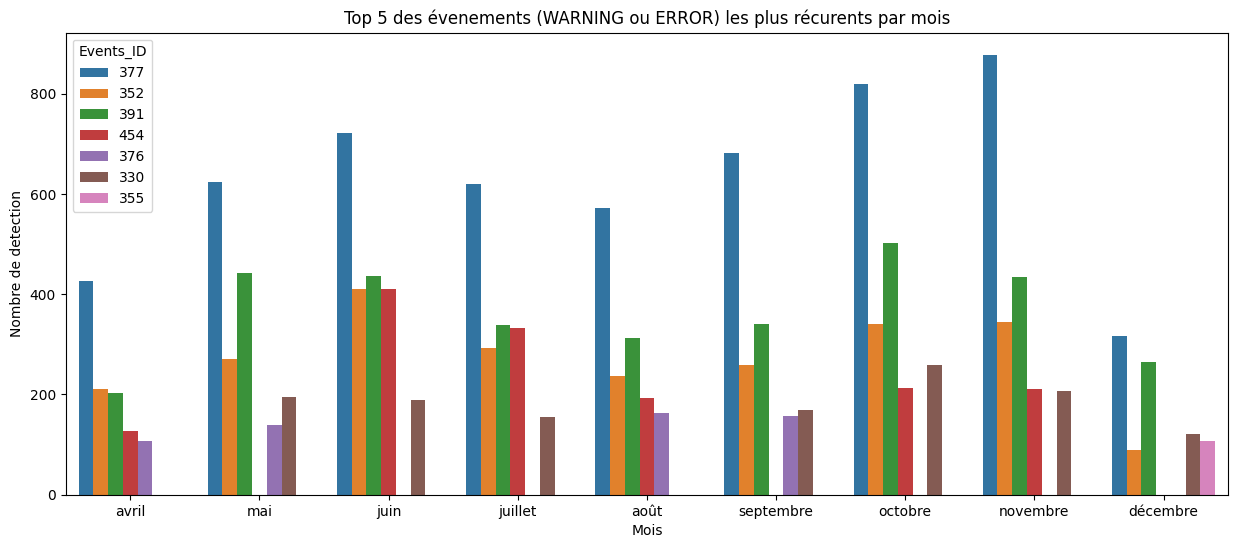

In [27]:
# On filtrer pour n'inclure que les lignes avec 'ERR' ou 'WARNING'.
df_filtered = df_exploded[df_exploded['status'].isin(['ERR', 'WARNING'])]


# Rééchantillonnage par mois et comptage du nombre d'events_id pour chaque mois.
df_monthly_counts = df_filtered.resample('M')['events_id'].value_counts().rename('count').reset_index()

# On groupe par la colonne "created_at" et on applique une fonction lambda à chaque groupe. 
# La fonction lambda prend les 5 premières lignes de chaque groupe sur la base de la colonne "count".
df_top5_monthly = df_monthly_counts.groupby('created_at').apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)

# On convertie les dates en Français
df_top5_monthly['Month'] = df_top5_monthly['created_at'].apply(lambda x: format_date(x, 'MMMM', locale='fr_FR'))

# On affiche avec seaborn
plt.figure(figsize=(15, 6))
sns.barplot(x='Month', y='count', hue='events_id', data=df_top5_monthly)
plt.title('Top 5 des évenements (WARNING ou ERROR) les plus récurents par mois')
plt.xlabel('Mois')
plt.ylabel('Nombre de detection')
plt.legend(title='Events_ID')

plt.show()